# 確率と統計の基礎

In [16]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

%precision 3

np.random.seed(0)

In [9]:
# サイコロ
dice_data = np.array([1,2,3,4,5,6])
print(dice_data)

[1 2 3 4 5 6]


In [12]:
# random choice
print('1つだけランダムに抽出：',np.random.choice(dice_data,1))

1つだけランダムに抽出： [5]


In [6]:
print('10つランダムに抽出：',np.random.choice(dice_data,10))
print(type(np.random.choice(dice_data,10)))

10つランダムに抽出： [5 3 2 1 2 6 2 6 1 2]
<class 'numpy.ndarray'>


In [13]:
# サイコロを1000回振ってみる
calc_steps = 1000
dice_rolls = np.random.choice(dice_data,calc_steps)
for i in range(1,7):
    p = len(dice_rolls[dice_rolls==i])/calc_steps
    print(i,'が出る確率',p)

1 が出る確率 0.171
2 が出る確率 0.158
3 が出る確率 0.157
4 が出る確率 0.183
5 が出る確率 0.16
6 が出る確率 0.171


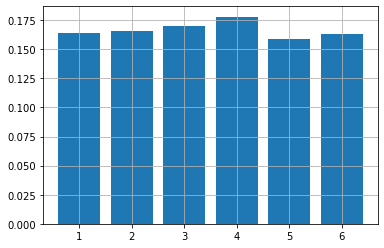

In [14]:
# 一様分布
calc_steps = 1000
dice_rolls = np.random.choice(dice_data,calc_steps)
prob_data = np.array([])
for i in range(1,7):
    p = len(dice_rolls[dice_rolls==i])/calc_steps
    prob_data = np.append(prob_data,p)
plt.bar(dice_data,prob_data)
plt.grid(True)

In [18]:
# ベルヌーイ分布
# コインの表裏
prob_be_data = np.array([])
coin_data = np.array([0,0,0,0,0,1,1,1])
# np.unique で一意な値を抽出（ここでは0と1）
for i in np.unique(coin_data):
    p = len(coin_data[coin_data==i])/len(coin_data)
    print(i,'が出る確率',p)
    prob_be_data = np.append(prob_be_data,p)

0 が出る確率 0.625
1 が出る確率 0.375


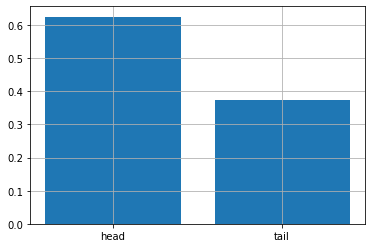

In [21]:
plt.bar([0,1],prob_be_data,align='center')
plt.xticks([0,1],['head','tail'])
plt.grid(True)

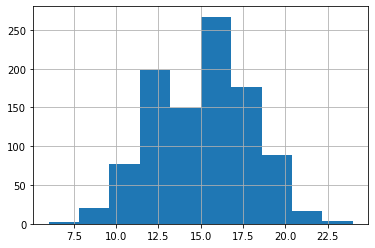

In [34]:
# 二項分布
np.random.seed(0)
x = np.random.binomial(30,0.5,1000)
# 確率0.5の試行を30回実施した時の発生回数を1000個返す。
plt.hist(x)
plt.grid(True)

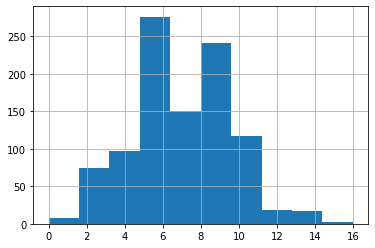

In [35]:
#　ポアソン分布
x = np.random.poisson(7,1000)
# 7がlambda、1000がサンプル数
plt.hist(x)
plt.grid(True)

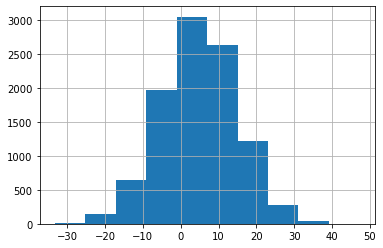

In [36]:
# 正規分布
# np.random.normal(平均,標準偏差,サンプル数)
x = np.random.normal(5,10,10000)
plt.hist(x)
plt.grid(True)

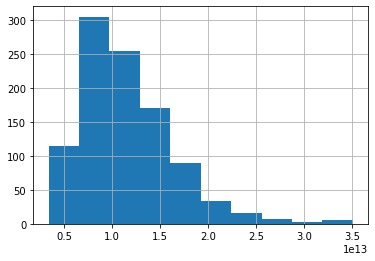

In [37]:
# 対数正規分布
x = np.random.lognormal(30,0.4,1000)
plt.hist(x)
plt.grid(True)